In [1]:
#import libraries
import pandas as pd
import keras
from sklearn.preprocessing import LabelEncoder
import matplotlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


##read the dataset

In [2]:
data =pd.read_csv('weatherHistory.csv')

In [3]:
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


##data analysis


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [5]:
data.shape

(96453, 12)

In [6]:
data.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


,0
Temperature (C),"Axes(0.125,0.53;0.352273x0.35)"


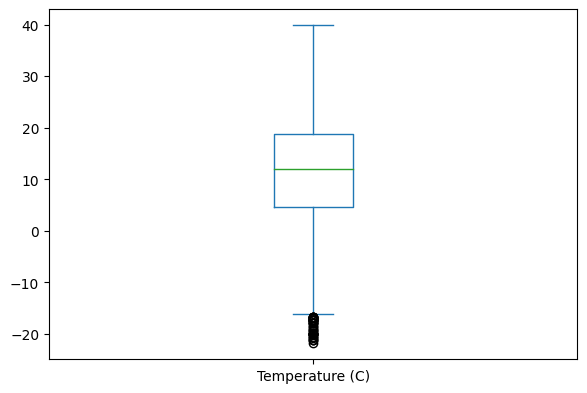

In [7]:
data['Temperature (C)'].plot(kind='box',subplots=True,layout=(2,2),figsize=(15,10))

##remove nulls

In [8]:
data.isna().sum()

,0
Formatted Date,0
Summary,0
Precip Type,517
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [9]:
data.dropna(inplace=True)

In [10]:
data.isna().sum()

,0
Formatted Date,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0


In [11]:
data.reset_index(drop=True,inplace=True)

In [12]:
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
95931,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
95932,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
95933,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
95934,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


##remove outliers

In [13]:
for x in ['Pressure (millibars)',]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
    print(f'For {x} Min Outliers has {data.loc[data[x] < min,x].shape[0]} rows and Max has {data.loc[data[x] > max,x].shape[0] } rows')
    data.loc[data[x] < min,x] = np.nan
    data.loc[data[x] > max,x] = np.nan

data = data.dropna(axis = 0)
data.reset_index(inplace=True)
data.drop(['index'],axis = 1,inplace=True)

For Pressure (millibars) Min Outliers has 4414 rows and Max has 4758 rows


<ipython-input-13-4bbb4441383e>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['index'],axis = 1,inplace=True)


In [14]:
for x in ['Pressure (millibars)',]:
    q75,q25 = np.percentile(data.loc[:,x],[75,25])
    intr_qr = q75-q25
    max = q75+(1*intr_qr)
    min = q25-(1*intr_qr)
    print(f'For {x} Min Outliers has {data.loc[data[x] < min,x].shape[0]} rows and Max has {data.loc[data[x] > max,x].shape[0] } rows')


For Pressure (millibars) Min Outliers has 1243 rows and Max has 1831 rows


In [15]:
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
86759,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
86760,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
86761,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
86762,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


##feature enginering

In [16]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)


<ipython-input-16-7636a6af75d5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86764 entries, 0 to 86763
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            86764 non-null  datetime64[ns, UTC]
 1   Summary                   86764 non-null  object             
 2   Precip Type               86764 non-null  object             
 3   Temperature (C)           86764 non-null  float64            
 4   Apparent Temperature (C)  86764 non-null  float64            
 5   Humidity                  86764 non-null  float64            
 6   Wind Speed (km/h)         86764 non-null  float64            
 7   Wind Bearing (degrees)    86764 non-null  float64            
 8   Visibility (km)           86764 non-null  float64            
 9   Loud Cover                86764 non-null  float64            
 10  Pressure (millibars)      86764 non-null  float64            
 11  Daily Summary  

In [18]:
data['day'] = data['Formatted Date'].dt.day
data['month'] = data['Formatted Date'].dt.month
data['year'] = data['Formatted Date'].dt.year
data['year'] = data['Formatted Date'].dt.year
data['hour'] = data['Formatted Date'].dt.hour
data['minute'] = data['Formatted Date'].dt.minute
data['second'] = data['Formatted Date'].dt.second


<ipython-input-18-0e4fd4d22d84>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['day'] = data['Formatted Date'].dt.day
<ipython-input-18-0e4fd4d22d84>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['month'] = data['Formatted Date'].dt.month
<ipython-input-18-0e4fd4d22d84>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [19]:
data.drop(['Formatted Date'],axis = 1,inplace=True)

<ipython-input-19-9739fb77bfe5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['Formatted Date'],axis = 1,inplace=True)


In [20]:
data

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,day,month,year,hour,minute,second
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,31,3,2006,22,0,0
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,31,3,2006,23,0,0
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,1,4,2006,0,0,0
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,1,4,2006,1,0,0
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,1,4,2006,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86759,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,9,9,2016,17,0,0
86760,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,9,9,2016,18,0,0
86761,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,9,9,2016,19,0,0
86762,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.,9,9,2016,20,0,0


In [21]:
data.isna().sum()

,0
Summary,0
Precip Type,0
Temperature (C),0
Apparent Temperature (C),0
Humidity,0
Wind Speed (km/h),0
Wind Bearing (degrees),0
Visibility (km),0
Loud Cover,0
Pressure (millibars),0


##prepare regression model and evaluate

In [22]:
X=data.drop(['minute','second','Temperature (C)','Apparent Temperature (C)'],axis=1)
y=data['Temperature (C)']

In [23]:
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", categorical_features)

Categorical features: ['Summary', 'Precip Type', 'Daily Summary']


In [24]:
X.shape

(86764, 13)

In [25]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
X = ct.fit_transform(X)

In [26]:
X.shape

(86764, 247)

In [27]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [28]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf_regressor = RandomForestRegressor(n_estimators = 20, max_depth=20, random_state = 42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(max_depth=20, n_estimators=20, random_state=42)

In [30]:
from sklearn.metrics import mean_squared_error
y_pred_tr = rf_regressor.predict(X_train)
y_pred = rf_regressor.predict(X_test)
error_tr = np.sqrt(mean_squared_error(y_train, y_pred_tr))
error_test = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE for train = ',error_tr)
print('RMSE for test = ',error_test)

RMSE for train =  0.8841203312357397
RMSE for test =  1.7580822094663742


In [31]:
print("Training set score:", rf_regressor.score(X_train, y_train))
print("Test set score:", rf_regressor.score(X_test, y_test))

Training set score: 0.9910405280915929
Test set score: 0.9648610217316089


In [32]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
86712,21.005556,20.619054
42930,27.033333,23.344944
28555,13.888889,12.300865
52874,21.111111,18.526739
78907,17.188889,14.877500
...,...,...
73690,1.088889,1.197623
36788,-0.444444,-1.007949
19931,25.977778,25.747737
53839,16.038889,16.757612


##classification

In [33]:
#create new column called type
def Value(x) :
  if x >=12 :
    return 0
  else:
    return 1


data['type'] = data['Temperature (C)'].apply(lambda x : Value(x))

<ipython-input-33-bea63e79158f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type'] = data['Temperature (C)'].apply(lambda x : Value(x))


In [34]:
data['type'].value_counts()

,count
type,
0,46538
1,40226


<Axes: >

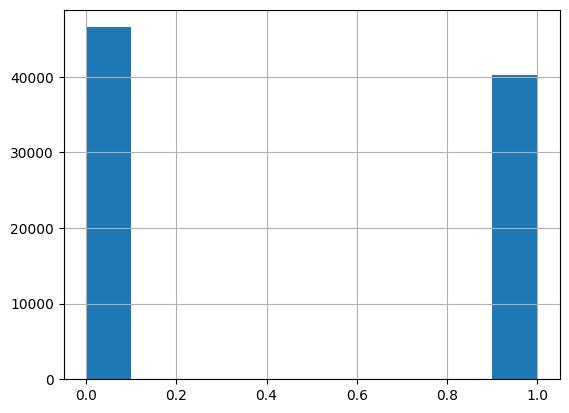

In [35]:
data['type'].hist()

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86764 entries, 0 to 86763
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   86764 non-null  object 
 1   Precip Type               86764 non-null  object 
 2   Temperature (C)           86764 non-null  float64
 3   Apparent Temperature (C)  86764 non-null  float64
 4   Humidity                  86764 non-null  float64
 5   Wind Speed (km/h)         86764 non-null  float64
 6   Wind Bearing (degrees)    86764 non-null  float64
 7   Visibility (km)           86764 non-null  float64
 8   Loud Cover                86764 non-null  float64
 9   Pressure (millibars)      86764 non-null  float64
 10  Daily Summary             86764 non-null  object 
 11  day                       86764 non-null  int32  
 12  month                     86764 non-null  int32  
 13  year                      86764 non-null  int32  
 14  hour  

In [37]:
x=data.drop(['minute','second','Temperature (C)','type','Apparent Temperature (C)'],axis=1)
y=data['type']

In [38]:
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical features:", categorical_features)

Categorical features: ['Summary', 'Precip Type', 'Daily Summary']


In [39]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), categorical_features)], remainder='passthrough')
x = ct.fit_transform(x)

In [40]:

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [41]:
x_train.shape

(69411, 247)

In [42]:
y_train.shape

(69411,)

In [43]:
#random forest
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, max_depth=50, criterion = 'entropy', random_state = 42)
classifier.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=10,
                       random_state=42)

In [44]:
y_pred_tr = classifier.predict(x_train)
y_pred = classifier.predict(x_test)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, y_pred_tr)

0.9969025082479722

In [46]:
#classification report
from sklearn.metrics import classification_report
print(classification_report(y_train, y_pred_tr))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37225
           1       1.00      0.99      1.00     32186

    accuracy                           1.00     69411
   macro avg       1.00      1.00      1.00     69411
weighted avg       1.00      1.00      1.00     69411



In [47]:
# compare actual abd predict
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
86712,0,0
42930,0,0
28555,0,0
52874,0,0
78907,0,0
...,...,...
73690,1,1
36788,1,1
19931,0,0
53839,0,0


In [48]:
#condusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[8970,  343],
       [ 761, 7279]])

<Axes: >

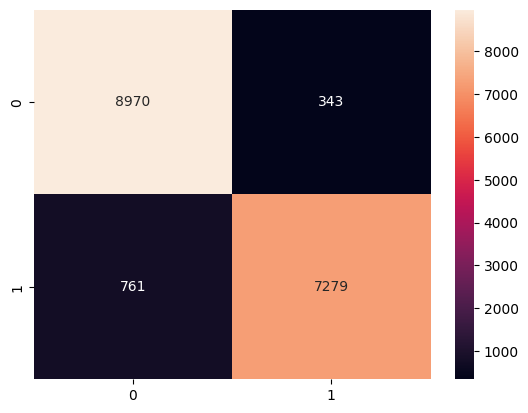

In [49]:
#plot confusion matrix
import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g')
